# Scipy

In [9]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

In [10]:
Max_Temp = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
Min_Temp = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

Text(0, 0.5, 'Temperature (° C)')

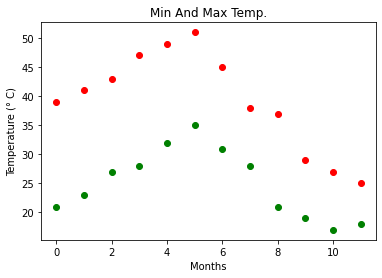

In [16]:
months=np.arange(12)
plt.figure()
plt.plot(months,Max_Temp,'ro')
plt.plot(months,Min_Temp,'go')
plt.title('Min And Max Temp.')
plt.xlabel('Months')
plt.ylabel('Temperature (\u00B0 C)')

In [19]:
from scipy import optimize

def yearly_temp(times, avg , ampl , time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))
res_max, cov_max = optimize.curve_fit(yearly_temp, months, Max_Temp, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temp, months, Min_Temp, [-40, 20, 0])

Text(0, 0.5, 'Temperature (° C)')

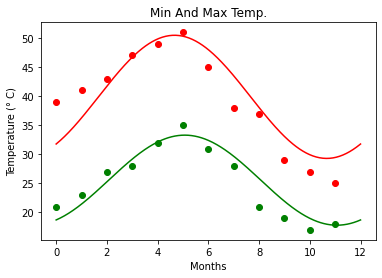

In [22]:
days = np.linspace(0,12,num=365)
plt.figure()
plt.plot(days,yearly_temp(days, *res_max), 'r-')
plt.plot(days, yearly_temp(days, *res_min), 'g-')
plt.plot(months,Max_Temp,'ro')
plt.plot(months,Min_Temp,'go')
plt.title('Min And Max Temp.')
plt.xlabel('Months')
plt.ylabel('Temperature (\u00B0 C)')

# Matplotlib

# 1.

In [25]:
import pandas as pd 
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [98]:
tot_male = titanic[titanic['sex']=='male'].index.value_counts().count()
print('Total Male count is {}'.format(tot_male))
tot_female = titanic[titanic['sex']=='female'].index.value_counts().count()
print('Total Female count is {}'.format(tot_female))

Total Male count is 843
Total Female count is 466


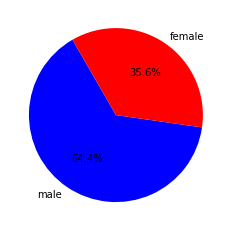

In [175]:
list = [tot_male,tot_female]
gender = ['male','female']
colors = ['b','r']
plt.pie(list,labels=gender,colors=colors,startangle=120,autopct='%.1f%%')
plt.show()

# 2.

In [119]:
titanic[['fare','age']]

,fare,age
0,211.3375,29.0000
1,151.5500,0.9167
2,151.5500,2.0000
3,151.5500,30.0000
4,151.5500,25.0000
...,...,...
1305,14.4542,NaN
1306,7.2250,26.5000
1307,7.2250,27.0000
1308,7.8750,29.0000


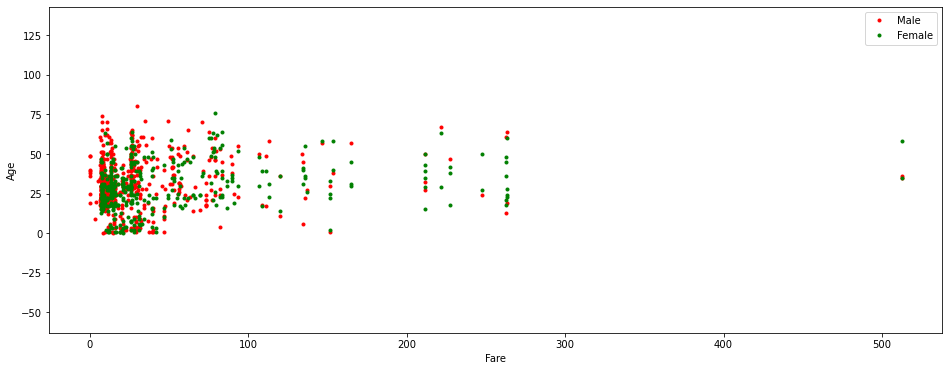

In [173]:
male = titanic[titanic['sex']=='male']
female = titanic[titanic['sex']=='female']
fig = plt.figure(figsize = (16,6))
plt.plot(male.fare,male.age,'.r', label='Male')
plt.plot(female.fare,female.age,'.g', label='Female')
plt.axis('equal')
plt.xlabel('Fare')
plt.ylabel('Age')
leg = plt.legend()
plt.show()